In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import time
import numpy as np
import keras_tuner as kt

In [8]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [9]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
def build_the_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
    hp_units = hp.Int('units', min_value=32, max_value=512, step=64)
    model.add(tf.keras.layers.Dense(units=hp_units, activation='tanh', kernel_initializer = keras.initializers.GlorotNormal))
    model.add(tf.keras.layers.Dense(units=10, activation='softmax', kernel_initializer = keras.initializers.GlorotNormal))
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=keras.optimizers.SGD(learning_rate=hp_learning_rate), 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])
    
    return model

In [16]:
tuner = kt.RandomSearch(build_the_model,
                     objective='val_accuracy',
                     max_trials=10,
                       directory = 'f')

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(x_train, y_train, epochs=16, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.get_best_models()[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

NameError: name 'build_the_model' is not defined

In [12]:
# Regularisation and batch norm
model_tuned = tf.keras.Sequential()
model_tuned.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model_tuned.add(tf.keras.layers.Dense(units=224, activation=keras.layers.LeakyReLU(alpha=0.1), kernel_initializer = keras.initializers.GlorotNormal, kernel_regularizer='l2'))
model_tuned.add(tf.keras.layers.BatchNormalization())
model_tuned.add(tf.keras.layers.Dropout(0.3))
model_tuned.add(tf.keras.layers.Dense(units=10, activation='softmax', kernel_initializer = keras.initializers.HeUniform))

# Compile and fit
model_tuned.compile(optimizer=keras.optimizers.SGD(0.01), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history=model_tuned.fit(x_train,y_train, epochs=16, validation_split=0.2)

Epoch 1/16


2022-04-28 16:44:45.603825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1498/1500 [============================>.] - ETA: 0s - loss: 3.2436 - accuracy: 0.7882

2022-04-28 16:44:55.348972: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 11s 5ms/step - loss: 3.2426 - accuracy: 0.7882 - val_loss: 2.3744 - val_accuracy: 0.8412
Epoch 2/16
1500/1500 [==============================] - 8s 5ms/step - loss: 1.9335 - accuracy: 0.8337 - val_loss: 1.5261 - val_accuracy: 0.8434
Epoch 3/16
1500/1500 [==============================] - 8s 5ms/step - loss: 1.2566 - accuracy: 0.8449 - val_loss: 1.0083 - val_accuracy: 0.8588
Epoch 4/16
1500/1500 [==============================] - 8s 5ms/step - loss: 0.8957 - accuracy: 0.8505 - val_loss: 0.7631 - val_accuracy: 0.8562
Epoch 5/16
1500/1500 [==============================] - 8s 5ms/step - loss: 0.7017 - accuracy: 0.8523 - val_loss: 0.7167 - val_accuracy: 0.8311
Epoch 6/16
1500/1500 [==============================] - 8s 6ms/step - loss: 0.5937 - accuracy: 0.8537 - val_loss: 0.5778 - val_accuracy: 0.8493
Epoch 7/16
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5351 - accuracy: 0.8552 - val_loss: 0.5164 - val_accuracy: 0.8566
Ep

In [14]:
model_tuned.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 224)               175840    
_________________________________________________________________
batch_normalization_4 (Batch (None, 224)               896       
_________________________________________________________________
dropout_4 (Dropout)          (None, 224)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2250      
Total params: 178,986
Trainable params: 178,538
Non-trainable params: 448
_________________________________________________________________


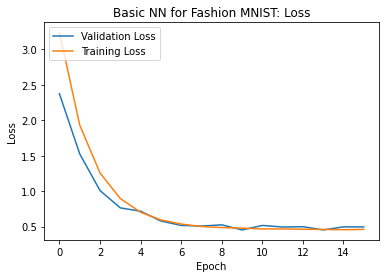

In [15]:
plt.plot(history.history['val_loss']) 
plt.plot(history.history['loss'])
plt.title('Basic NN for Fashion MNIST: Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Validation Loss', "Training Loss"], loc='upper left')
plt.show()